In [1]:
import xarray as xr

In [3]:
pwd

'/Users/sebastianessink/Dropbox (MIT)/niw/notebooks/data_download'

In [4]:
ls ../../data/C

ls: ../../data/C: No such file or directory


In [36]:
from glob import glob

In [168]:
files = glob('../../data/CFS/cdas1.*.ocngrbh.grb2.nc')

In [169]:
droplist = ['time_bnds0','valid_date_time_range0','ref_date_time0','forecast_hour0',
            'valid_date_time1','ref_date_time1','forecast_hour1','EMNP_L1_Avg_11','time1',
           'forecast_hour','time_bnds','ntb','valid_date_time_range','ref_date_time','valid_date_time_range1',
           'time_bnds1']

In [170]:
def preproc(df):
    try:
        df = df.rename_dims({'time0':'time'})
        df = df.rename({'time0':'time'})
#         df = df.drop(['time0'])
    except:
        None
    return df

In [171]:
liste=[]
for file in files:
    dat = xr.open_dataset(file, drop_variables=droplist)
    liste.append(preproc(dat))
    
data = xr.concat(liste,dim='time')

In [180]:
data['EMNP_L1_Avg_1'] = data.EMNP_L1_Avg_1.sel(time1=1,drop=True)
data = data.rename_vars({'EMNP_L1_Avg_1':'EMP'})

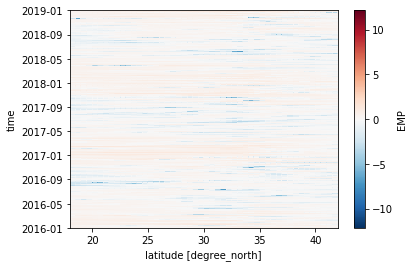

In [186]:
data.EMP.mean(dim='lon').sortby('time').plot()

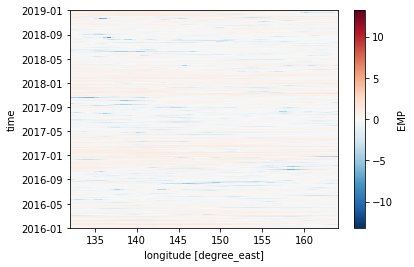

In [187]:
data.EMP.mean(dim='lat').sortby('time').plot()

In [ ]:
data.EMP.mean(dim='time').sortby('time').plot()

## Convert E-P to buoyancy flux
The density fluz is given by
$$
F_{\rho} = -\rho(\alpha F_T - \beta F_S)
$$
where the salt flux is
$$
F_S = (E-P)S/(1-S).
$$
